In [17]:
import pandas as pd 
from datetime import datetime 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
import numpy as np 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv('leadscoring_v2.csv')
df.columns = [x.lower() for x in df.columns]

In [27]:
df.columns

Index(['company_id', 'company_created_date', 'is_converted',
       'industry_category', 'first_num_of_employees',
       'how_did_you_hear_about_us', 'marketing_channel', 'marketing_source',
       'total_web_duration', 'reg_device_category', 'reg_session_duration',
       'is_overview_call_scheduled'],
      dtype='object')

In [24]:
len(df)

17717

In [20]:
(df['is_converted'].value_counts(normalize=True) * 100)

False    85.618333
True     14.381667
Name: is_converted, dtype: float64

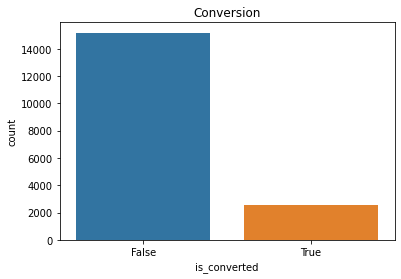

In [22]:
plot_converted = sns.countplot(x='is_converted', data=df)\
                    .set(title='Conversion')

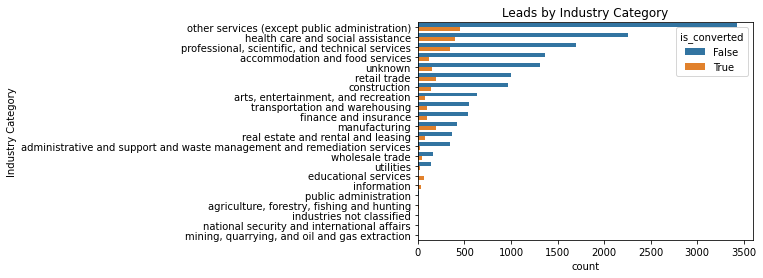

In [25]:
c = sns.countplot(y='industry_category',
                  hue='is_converted',
                  data=df,
                  order=df['industry_category'].value_counts().index)
c.set_title('Leads by Industry Category')
y_label = c.set_ylabel('Industry Category')

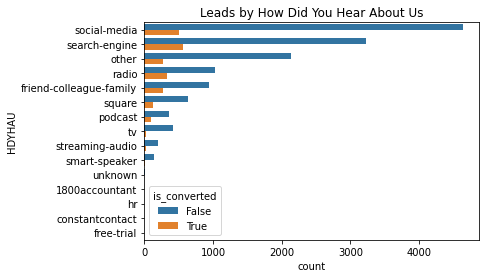

In [28]:
c = sns.countplot(y='how_did_you_hear_about_us',
                  hue='is_converted',
                  data=df,
                  order=df['how_did_you_hear_about_us'].value_counts().index)
c.set_title('Leads by How Did You Hear About Us')
y_label = c.set_ylabel('HDYHAU')

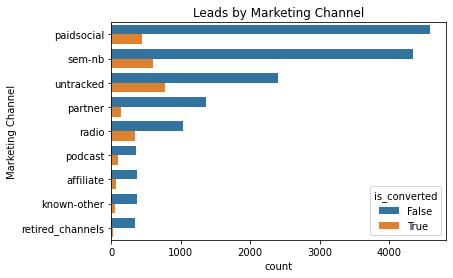

In [29]:
c = sns.countplot(y='marketing_channel',
                  hue='is_converted',
                  data=df,
                  order=df['marketing_channel'].value_counts().index)
c.set_title('Leads by Marketing Channel')
y_label = c.set_ylabel('Marketing Channel')

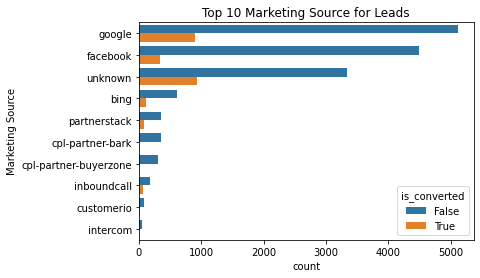

In [35]:
c = sns.countplot(y='marketing_source',
                  hue='is_converted',
                  data=df,
                  order=df['marketing_source'].value_counts().iloc[:10].index)
c.set_title('Top 10 Marketing Source for Leads')
y_label = c.set_ylabel('Marketing Source')

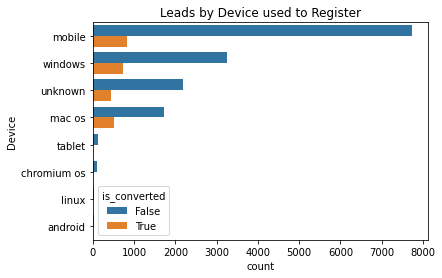

In [39]:
c = sns.countplot(y='reg_device_category',
                  hue='is_converted',
                  data=df,
                  order=df['reg_device_category'].value_counts().index)
c.set_title('Leads by Device used to Register')
y_label = c.set_ylabel('Device')

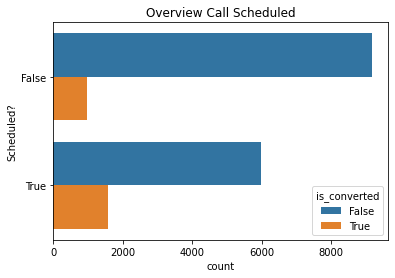

In [41]:
c = sns.countplot(y='is_overview_call_scheduled',
                  hue='is_converted',
                  data=df,
                  order=df['is_overview_call_scheduled'].value_counts().index)
c.set_title('Overview Call Scheduled')
y_label = c.set_ylabel('Scheduled?')

In [46]:
cat_cols = ['industry_category', 'how_did_you_hear_about_us', 'marketing_channel'
            , 'marketing_source', 'reg_device_category', 'is_overview_call_scheduled']

feature_cols = ['total_web_duration']

response_col = ['is_converted']

In [47]:
X = pd.get_dummies(data=df[cat_cols + feature_cols]
                   , columns=cat_cols)

In [52]:
y = df[response_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

Regular Regression

In [49]:
logreg = LogisticRegression(random_state=16
                            , solver='liblinear')

logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=16, solver='liblinear')

In [51]:
y_pred = logreg.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')

Accuracy Score: 0.8724604966139955
Area Under Curve: 0.5465088251728332
Recall score: 0.10084033613445378
F1 score: 0.17518248175182483


Weighted Regression: 

In [54]:
w = {0:0.15, 1:0.85}
# define model
lg2 = LogisticRegression(random_state=13,
                         class_weight=w,
                         solver='liblinear')
# fit it
lg2.fit(X_train, y_train.values.ravel())
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')

Accuracy Score: 0.7068284424379232
Area Under Curve: 0.6940045248868778
Recall score: 0.6764705882352942
F1 score: 0.38265002970885326
